In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

class Regresion_Lineal:
    colores = ['blue', 'gray','green','brown','red','black','yellow']
    nombre_col=['col0','col1','col2','col3','col4','col5']
    # parametro a DataFrame, parametro b = porcentaje%
    def creacion_dataframe(self, df, por):
        self.df = df
        self.por= por
        df = pd.DataFrame(df)
        df=df.sample(frac=por)
        return df
    
    def eliminacion_na(self, df_na):
        self.df_na = df_na
        df_na = df_na.dropna()
        return df_na

    def datos_estadisticos(self, df_x):
        self.df_x = df_x
        return df_x.describe()
    
    def grafica_histogramas(self, df_grafhisto):
        self.df_grafhisto = df_grafhisto
        fig, axes = plt.subplots(1, 6, figsize=(20, 5))
        fig.tight_layout()

        for i in range(0,6):
            sns.histplot(ax=axes[i], data=df_grafhisto.iloc[:,i], color=self.colores[i], bins=20, kde=True)
            
    def grafica_heatmap(self, df_grafheatmap):
        self.df_grafheatmap = df_grafheatmap
        sns.heatmap(df_grafheatmap.corr(),cmap='Greys', annot=True)
        
    def grafica_correlation(self, df_graphc):
        self.df_graphc = df_graphc
        fig_1, axes_corr = plt.subplots(6, 6,figsize=(13,10))
        df_correlation_graph = df_graphc.corr().round(2)
        for row_graph in range(0,6):
            for column_graph in range(0,6): 
                axes_corr[row_graph,column_graph].scatter(df_graphc.iloc[:,row_graph],df_graphc.iloc[:,column_graph])
                axes_corr[row_graph,column_graph].set_title("C: " + str(df_correlation_graph.iloc[row_graph,column_graph]))
        plt.tight_layout()

        
        
        

In [2]:
df_in=pd.DataFrame(np.load('proyecto_training_data.npy'))
df_in.columns = Regresion_Lineal().nombre_col

Entrenamiento_data=Regresion_Lineal()
Test_data = Regresion_Lineal()

#Eliminando datos null del dataFrame original
df_in = Entrenamiento_data.eliminacion_na(df_in)

#Separando el data frame en 20%(Datos de prueba) y 80%(Datos de entrenamiento) de manera aleatoria
df_test = Test_data.creacion_dataframe(df_in,0.2)
df_training = Entrenamiento_data.creacion_dataframe(df_in,0.8)

#Mostrando datos estadisticos, max, min, std, mean ...
print("Las longitudes de los sets son: ","Set Validacion " + str(len(df_test)),"Set Entrenamiento " + str(len(df_training)))
print("Los Datos estadisticos para cada una de las varibles en el DataFrame de entrenamiento son: ")
Entrenamiento_data.datos_estadisticos(df_training)

Las longitudes de los sets son:  Set Validacion 240 Set Entrenamiento 961
Los Datos estadisticos para cada una de las varibles en el DataFrame de entrenamiento son: 


,col0,col1,col2,col3,col4,col5
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,179808.609781,6.113424,1154.519251,6.540062,1971.284079,69.877211
std,80723.447983,1.406324,385.667103,1.646558,31.537403,24.259137
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,127000.000000,5.000000,874.000000,5.000000,1951.000000,59.000000
50%,159500.000000,6.000000,1082.000000,6.000000,1973.000000,70.000000
75%,212900.000000,7.000000,1382.000000,7.000000,2003.000000,80.000000
max,625000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


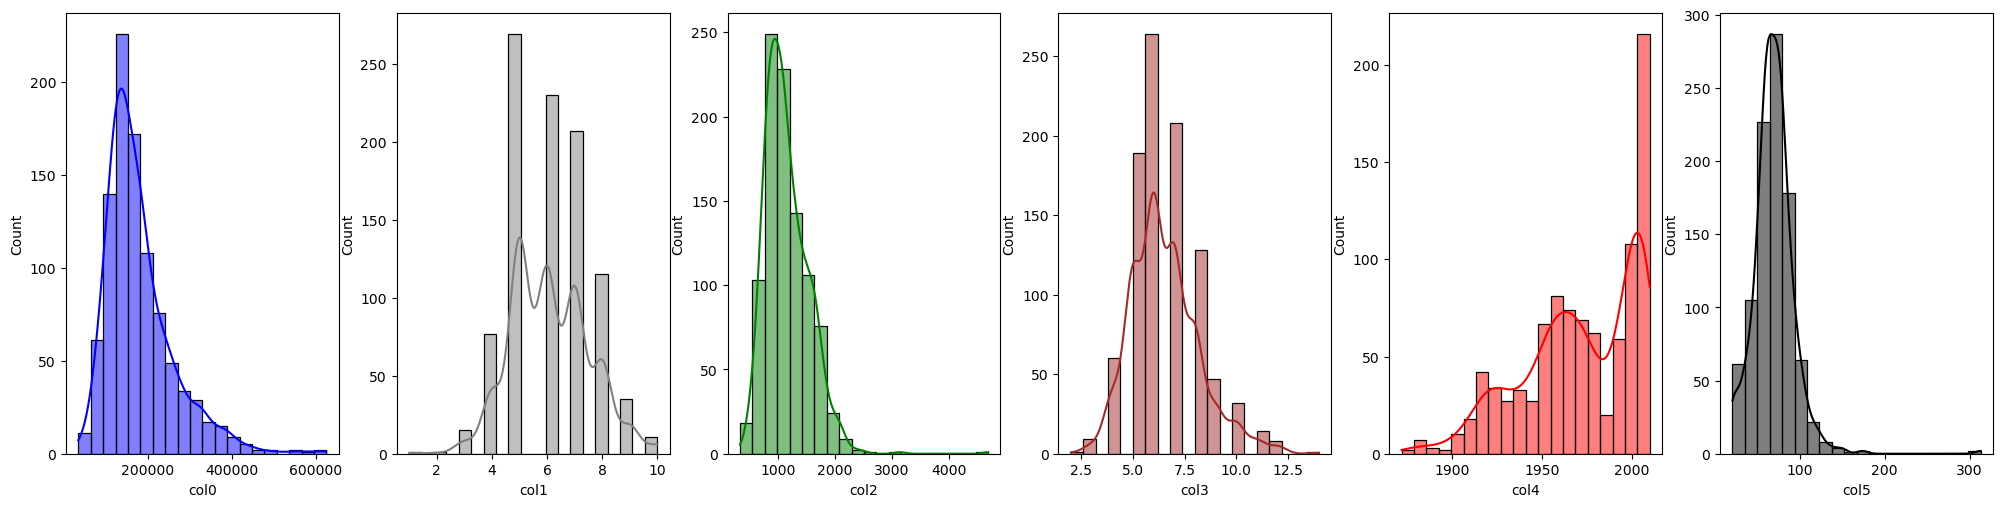

In [3]:
#Grafica Histogramas de cada una de las variables del DataFrame utilizando seaborn
Entrenamiento_data.grafica_histogramas(df_training)

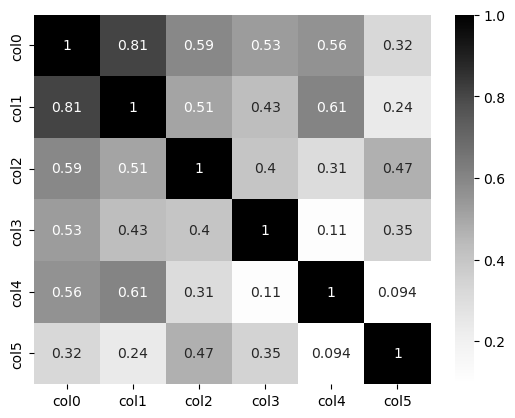

In [4]:
#Calculando la correlación entre cada una de las variables del DataFrame de Entrenamiento
Entrenamiento_data.grafica_heatmap(df_training)

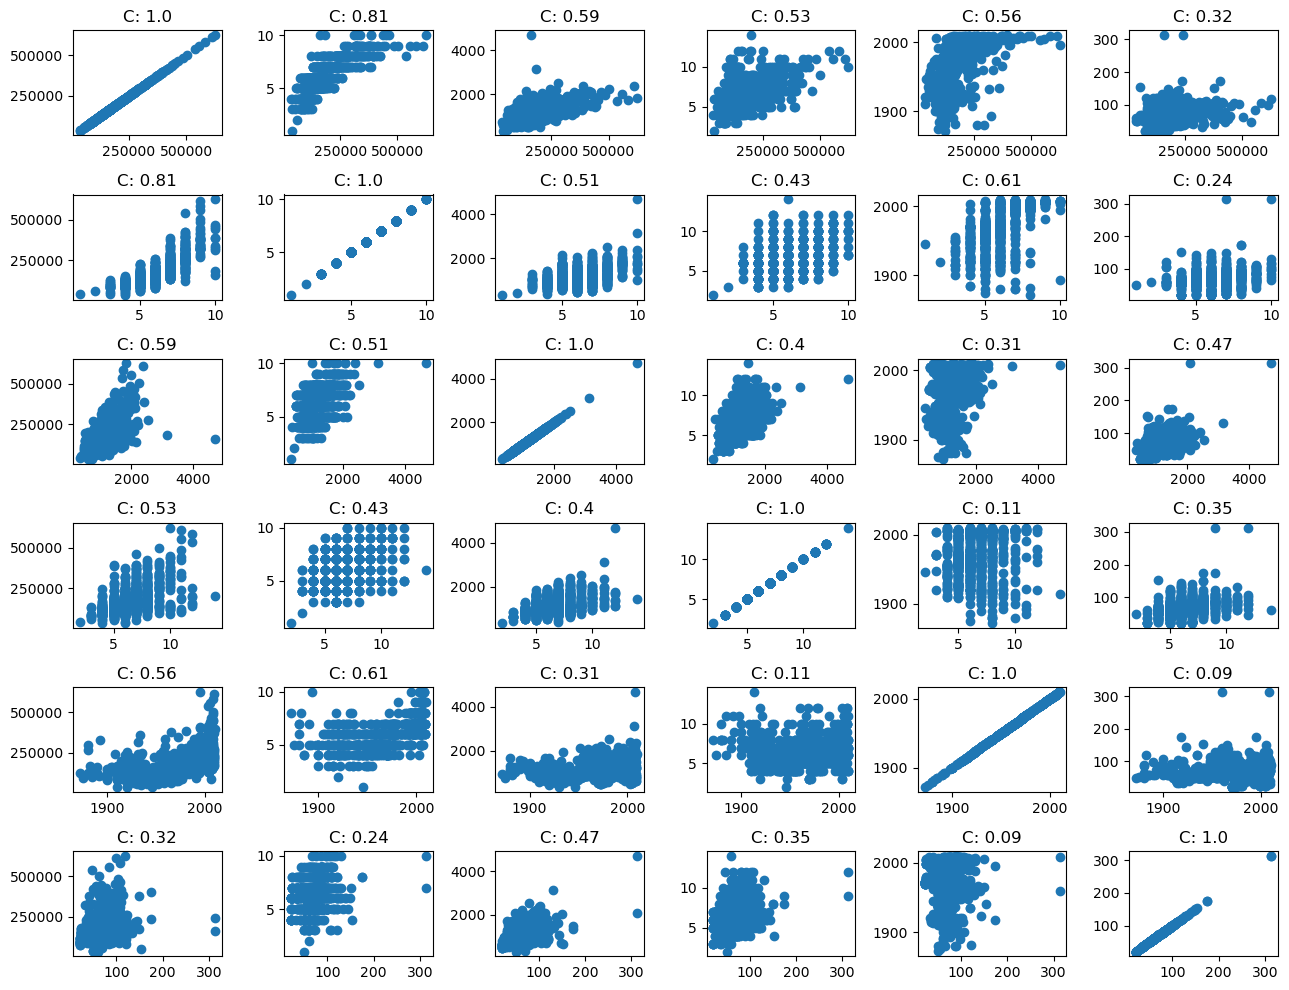

In [5]:
#Graficas de dispersion con el Coeficiente de correlacion como título de la gráfica
Entrenamiento_data.grafica_correlation(df_training)

Epoch 10
w: 8287.3 b: 1229.5
error: [2.1489593e+10]
Epoch 20
w: 14231.8 b: 2110.8
error: [1.25279838e+10]
Epoch 30
w: 18517.1 b: 2733.9
error: [7.87474239e+09]
Epoch 40
w: 21606.8 b: 3171.2
error: [5.45847933e+09]
Epoch 50
w: 23834.9 b: 3474.4
error: [4.20369375e+09]
Epoch 60
w: 25442.3 b: 3681.1
error: [3.55196727e+09]
Epoch 70
w: 26602.4 b: 3818.2
error: [3.21335955e+09]
Epoch 80
w: 27440.1 b: 3905.2
error: [3.0373286e+09]
Epoch 90
w: 28045.6 b: 3956.1
error: [2.94571046e+09]
Epoch 100
w: 28483.7 b: 3981.0
error: [2.89792105e+09]


Text(0, 0.5, 'y')

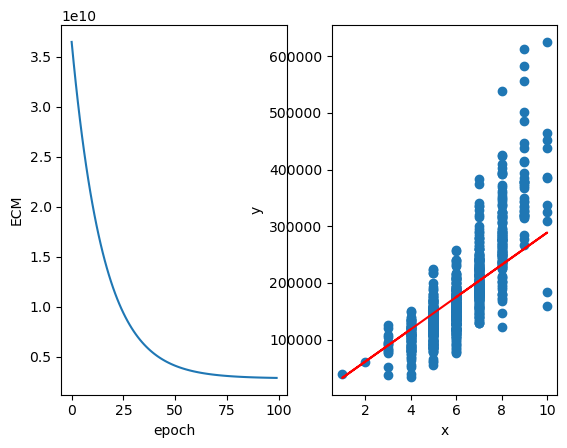

In [16]:
#Definiendo el producto punto para calcular el valor de Y_estimado
def calcular_modelo(w,b,x):
    x_T = np.array([x,np.ones_like(x)])
    return np.dot(x_T.T,[w,b])

#Calculando el error entre la estimación y la observación
def calcular_error(y,y_):
    N=y.shape[0]
    error = np.sum((y-y_)**2)/N
    return error

#Calculando la funcion a minimizar para reducir el error
def gradiente_descendente(w_, b_, alpha, x, y):
    
    N= x.shape[0]
    dw=-(2/N)*np.sum(x*(y-(w_*x+b_)))
    db=-(2/N)*np.sum(y-(w_*x+b_))
    
    #Actualizando los pesos para los valores w y b 
    w = w_ - alpha*dw
    b = b_ - alpha*db
    
    return w, b

#Seleccionando las columnas a utilizar para el modelo
df_training.plot.scatter(x='col1', y='col0')
x = df_training['col1'].values
y = df_training['col0'].values

w= 40
b= -10

alpha = 0.0004
nits = 100

error = np.zeros((nits,1))
for i in range(nits):
    [w,b]= gradiente_descendente(w,b,alpha,x,y)
    y_ = calcular_modelo(w,b,x)
    error[i]=calcular_error(y,y_)
    
    if (i+1)%10 == 0:
        print("Epoch {}".format(i+1))
        print("w: {:.1f}".format(w), "b: {:.1f}".format(b))
        print("error: {}".format(error[i]))
        print("===================================")
        
plt.subplot(1,2,1)
plt.plot(range(nits),error)
plt.xlabel('epoch')
plt.ylabel('ECM')

y_regr = calcular_modelo(w,b,x)
plt.subplot(1,2,2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')

In [29]:
'''
def calcular_modelo(w,b,x):
    
    return w*x+b

def calcular_error(y,y_):
    N=y.shape[0]
    error = np.sum((y-y_)**2)/N
    return error

def gradiente_descendente(w_, b_, alpha, x, y):
    
    N= x.shape[0]
    dw=-(2/N)*np.sum(x*(y-(w_*x+b_)))
    db=-(2/N)*np.sum(y-(w_*x+b_))
    
    w = w_ - alpha*dw
    b = b_ - alpha*db
    
    return w, b

df_training.plot.scatter(x='col1', y='col0')
x = df_training['col1'].values
y = df_training['col0'].values

np.random.seed(2)
w= 40
b= -10

alpha = 0.0004
nits = 40000

error = np.zeros((nits,1))
for i in range(nits):
    [w,b]= gradiente_descendente(w,b,alpha,x,y)
    y_ = calcular_modelo(w,b,x)
    error[i]=calcular_error(y,y_)
    
    if (i+1)%4000 ==0:
        print("Epoch {}".format(i+1))
        print("w: {:.1f}".format(w), "b: {:.1f}".format(b))
        print("error: {}".format(error[i]))
        print("===================================")
        
plt.subplot(1,2,1)
plt.plot(range(nits),error)
plt.xlabel('epoch')
plt.ylabel('ECM')

y_regr = calcular_modelo(w,b,x)
plt.subplot(1,2,2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
'''

'\ndef calcular_modelo(w,b,x):\n    \n    return w*x+b\n\ndef calcular_error(y,y_):\n    N=y.shape[0]\n    error = np.sum((y-y_)**2)/N\n    return error\n\ndef gradiente_descendente(w_, b_, alpha, x, y):\n    \n    N= x.shape[0]\n    dw=-(2/N)*np.sum(x*(y-(w_*x+b_)))\n    db=-(2/N)*np.sum(y-(w_*x+b_))\n    \n    w = w_ - alpha*dw\n    b = b_ - alpha*db\n    \n    return w, b\n\ndf_training.plot.scatter(x=\'col1\', y=\'col0\')\nx = df_training[\'col1\'].values\ny = df_training[\'col0\'].values\n\nnp.random.seed(2)\nw= 40\nb= -10\n\nalpha = 0.0004\nnits = 40000\n\nerror = np.zeros((nits,1))\nfor i in range(nits):\n    [w,b]= gradiente_descendente(w,b,alpha,x,y)\n    y_ = calcular_modelo(w,b,x)\n    error[i]=calcular_error(y,y_)\n    \n    if (i+1)%4000 ==0:\n        print("Epoch {}".format(i+1))\n        print("w: {:.1f}".format(w), "b: {:.1f}".format(b))\n        print("error: {}".format(error[i]))\n        print("===================================")\n        \nplt.subplot(1,2,1)\nplt.